In [155]:
import json
from nltk.tokenize import TweetTokenizer
import plotly.graph_objects as go
from statistics import mean
from typing import List, Dict

In [156]:
with open("../../JSON/the_old_bachelor.json", "r") as tob_file:
    tob = json.load(tob_file)
with open("../../JSON/the_double_dealer.json", "r") as tdd_file:
    tdd = json.load(tdd_file)
with open("../../JSON/love_for_love.json", "r") as lfl_file:
    lfl = json.load(lfl_file)
with open("../../JSON/the_way_of_the_world.json", "r") as twotw_file:
    twotw = json.load(twotw_file)

In [157]:
# Create seperate lists, grouping men and women based on the dramatis personae of each play
tob_men = ["heartwell", "bellmour", "vainlove", "sharper", "sir joseph", "captain bluffe", "fondlewife", "setter", "servant",]
tob_women = ["araminta", "belinda", "laetitia", "silvia", "lucy", "betty",]
tdd_men = ["maskwell", "lord touchwood", "mellefont", "careless", "lord froth", "brisk", "sir paul plyant",]
tdd_women = ["lady touchwood", "cynthia", "lady froth", "lady plyant",]
lfl_men = ["sir sampson legend", "valentine", "scandal", "tattle", "ben", "foresight", "jeremy", "trapland", "buckram",]
lfl_women = ["angelica", "mrs. foresight", "mrs. frail", "miss prue", "nurse", "jenny",]
twotw_men = ["fainall", "mirabell", "witwoud", "petulant", "sir willfull witwoud", "waitwell",]
twotw_women =["lady wishfort", "millamant", "mrs. marwood", "mrs. fainall", "foible", "mincing",]

In [158]:
# Calculate the average speech length for each character in each act
def calculate_average_speech_length(avg_len_dict: Dict[str, Dict[str, List[str]]]):
    tokenizer = TweetTokenizer()
    average_lengths = {}
    acts_list = ["act_1", "act_2", "act_3", "act_4", "act_5"]
    for character in avg_len_dict:
        average_lengths[character] = {}
        for act in acts_list:
            if act not in avg_len_dict[character]:
                average_lengths[character][act] = 0
                continue
            tokenized_lines = [tokenizer.tokenize(line) for line in avg_len_dict[character][act]]
            speech_lengths = [len(tokens) for tokens in tokenized_lines]
            average_length = round(mean(speech_lengths), 2)
            average_lengths[character][act] = average_length
    return average_lengths

In [159]:
tob_avg_len = calculate_average_speech_length(tob)
tdd_avg_len = calculate_average_speech_length(tdd)
lfl_avg_len = calculate_average_speech_length(lfl)
twotw_avg_len = calculate_average_speech_length(twotw)

In [160]:
# Create a line graph based on a dictionary containing average length of character speeches
# with buttons to show lines representing everyone, only men, or only women, or show no lines
def create_line_graph(avg_len_dict: Dict[str, Dict[str, float]], men_list: List[str], women_list: List[str], filename: str, title="Line Graph"):
    fig = go.Figure()
    for character, acts in avg_len_dict.items():
        acts_list = ["Act 1", "Act 2", "Act 3", "Act 4", "Act 5"]
        lengths = list(acts.values())
        fig.add_trace(go.Scatter(x=acts_list, y=lengths, mode="lines+markers", name=character.title()))

    # Add button to toggle all lines
    visible_all = [True] * len(avg_len_dict)
    fig.update_layout(
        updatemenus=[
            {
                "buttons": [
                    {
                        "args": [{"visible": visible_all}, {"title": title}],
                        "label": "All",
                        "method": "update",
                    },
                    {
                        "args": [{"visible": [True if character in men_list else False for character in avg_len_dict]}, {"title": f"{title} (Men)"}],
                        "label": "Men",
                        "method": "update",
                    },
                    {
                        "args": [{"visible": [True if character in women_list else False for character in avg_len_dict]}, {"title": f"{title} (Women)"}],
                        "label": "Women",
                        "method": "update",
                    },
                    {
                        "args": [{"visible": "legendonly"}, {"title": f"{title} (Custom)"}],
                        "label": "Custom",
                        "method": "update",
                    },
                ],
                "direction": "down",
                "showactive": True,
                "x": 1,
                "xanchor": "left",
                "y": 1.191,
                "yanchor": "top",
            }
        ]
    )
    
    fig.update_layout(title=title, xaxis_title="", yaxis_title="Average Speech Length")
    config = {"responsive": True}
    fig.show(config=config)
    fig.write_html(f"../../data-visualisation/average-speech-length/{filename}.html")

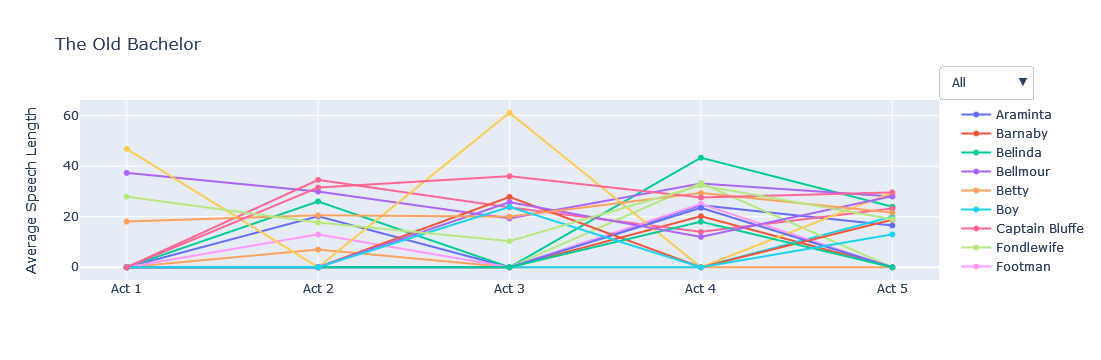

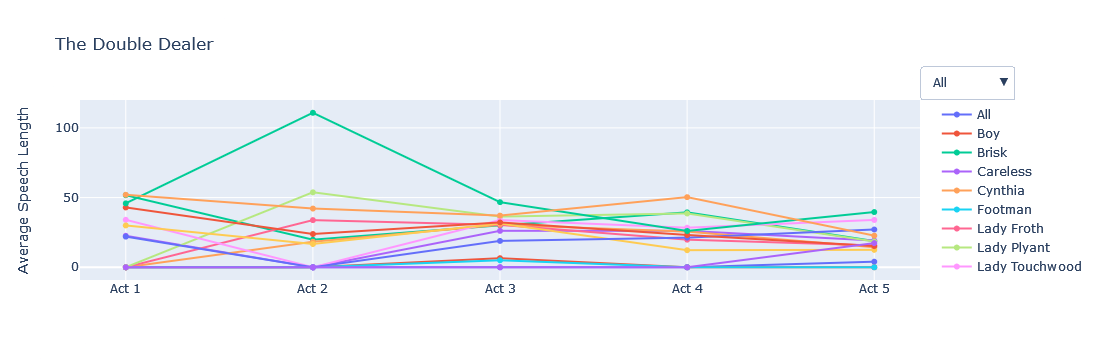

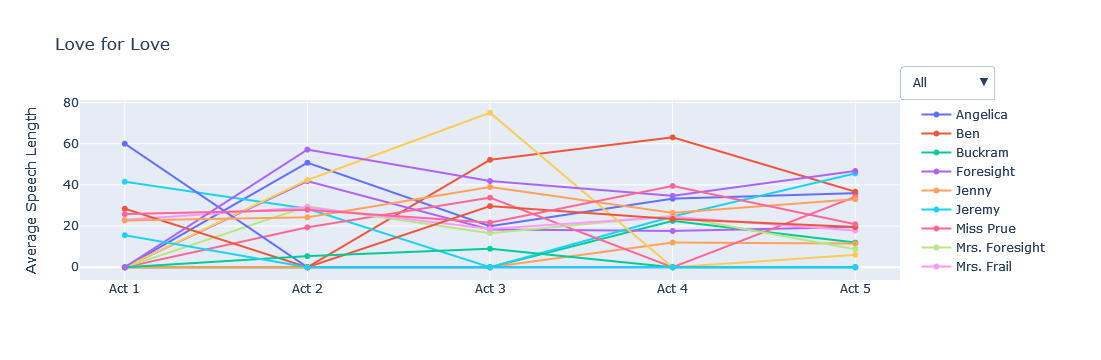

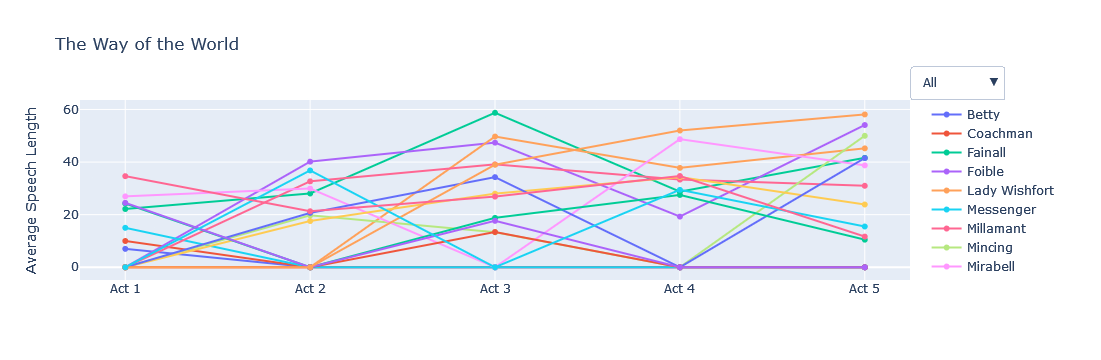

In [161]:
create_line_graph(tob_avg_len, tob_men, tob_women, title="The Old Bachelor", filename="tob_avg_len")
create_line_graph(tdd_avg_len, tdd_men, tdd_women, title="The Double Dealer", filename="tdd_avg_len")
create_line_graph(lfl_avg_len, lfl_men, lfl_women, title="Love for Love", filename="lfl_avg_len")
create_line_graph(twotw_avg_len, twotw_men, twotw_women, title="The Way of the World", filename="twotw_avg_len")